In [20]:
import sys
sys.path.append('../')
import uPVT.PVT as PVT
import math
import matplotlib.pyplot as plt
import pandas as pd
import uSep.separation as sp

In [21]:
data = pd.read_excel('SepTestData.xlsx')

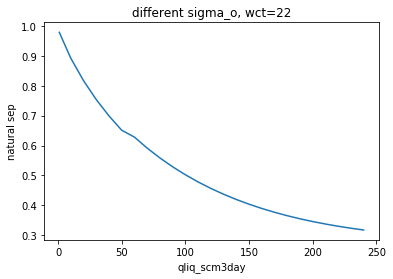

In [22]:
plt.plot(data['Q'],data['Естественная сепарация 100 мм'])
plt.ylabel('natural sep')
plt.xlabel('qliq_scm3day')
plt.title('different sigma_o, wct=22')

plt.show()

In [23]:
pintake_atm=80
q_sm3day=100
wct_perc=22
tintake_c=80
dintake_mm=100
dcasing_mm=125
gammagas=0.9
gammaoil=0.75
gammawater=1
rsb_m3m3=80
rp_m3m3=80
#оптциональные/калибровочные параметры
pb_atm=150
tres_c=120
bob_m3m3=1

fluid=PVT.FluidStanding(gammaoil,gammagas,gammawater,rsb_m3m3)
fluid.calc(pintake_atm,tintake_c)

def qgas_scm3day(qo_scm3day,rp_m3m3=rp_m3m3,qgfree_scm3day=0):
    return qo_scm3day*rp_m3m3+qgfree_scm3day

print(fluid.bo_m3m3)

1.9522964869459403


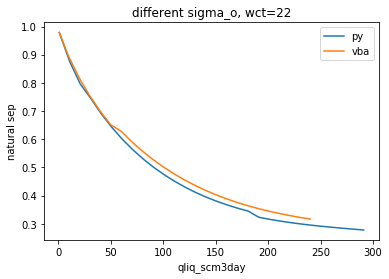

In [24]:
def getvalues(start=1,stop=300,step=10):
    q=[]
    sep=[]
    for i in range(start,stop,step):
        q.append(i)
        sep.append(sp.unf_calc_natural_separation(dintake_mm/1000,dcasing_mm/1000,
                                       i,
                                       qgas_scm3day(i*(1-wct_perc/100)),fluid.bo_m3m3,
                                       fluid.bg_m3m3,
                                       130/1000,fluid.rho_oil_stkgm3,
                                       fluid.rho_gas_sckgm3,wct_perc))
    return [q,sep]

result=getvalues()

plt.plot(result[0],result[1],label='py')
plt.plot(data['Q'],data['Естественная сепарация 100 мм'],label='vba')
plt.ylabel('natural sep')
plt.xlabel('qliq_scm3day')
plt.title('different sigma_o, wct=22')
plt.legend()
plt.show()